In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [3]:
df = boston.frame
print(df.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [4]:
df['Price']=boston.target

In [5]:
df.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666.0,20.2,375.87,16.74,17.8,17.8
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304.0,18.4,396.23,12.73,21.0,21.0
125,0.16902,0.0,25.65,0,0.581,5.986,88.4,1.9929,2,188.0,19.1,385.02,14.81,21.4,21.4


In [6]:
df.shape

(506, 15)

In [7]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'Price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
 14  Price    506 non-null    float64 
dtypes: category(2), float64(13)
memory usage: 53.0 KB


In [9]:
## Summaring the stats of the data
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


In [10]:
# Check for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
Price      0
dtype: int64

In [11]:
# Exploratory Data Analysis
# Correlation is super super important in Linear problems
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.468536


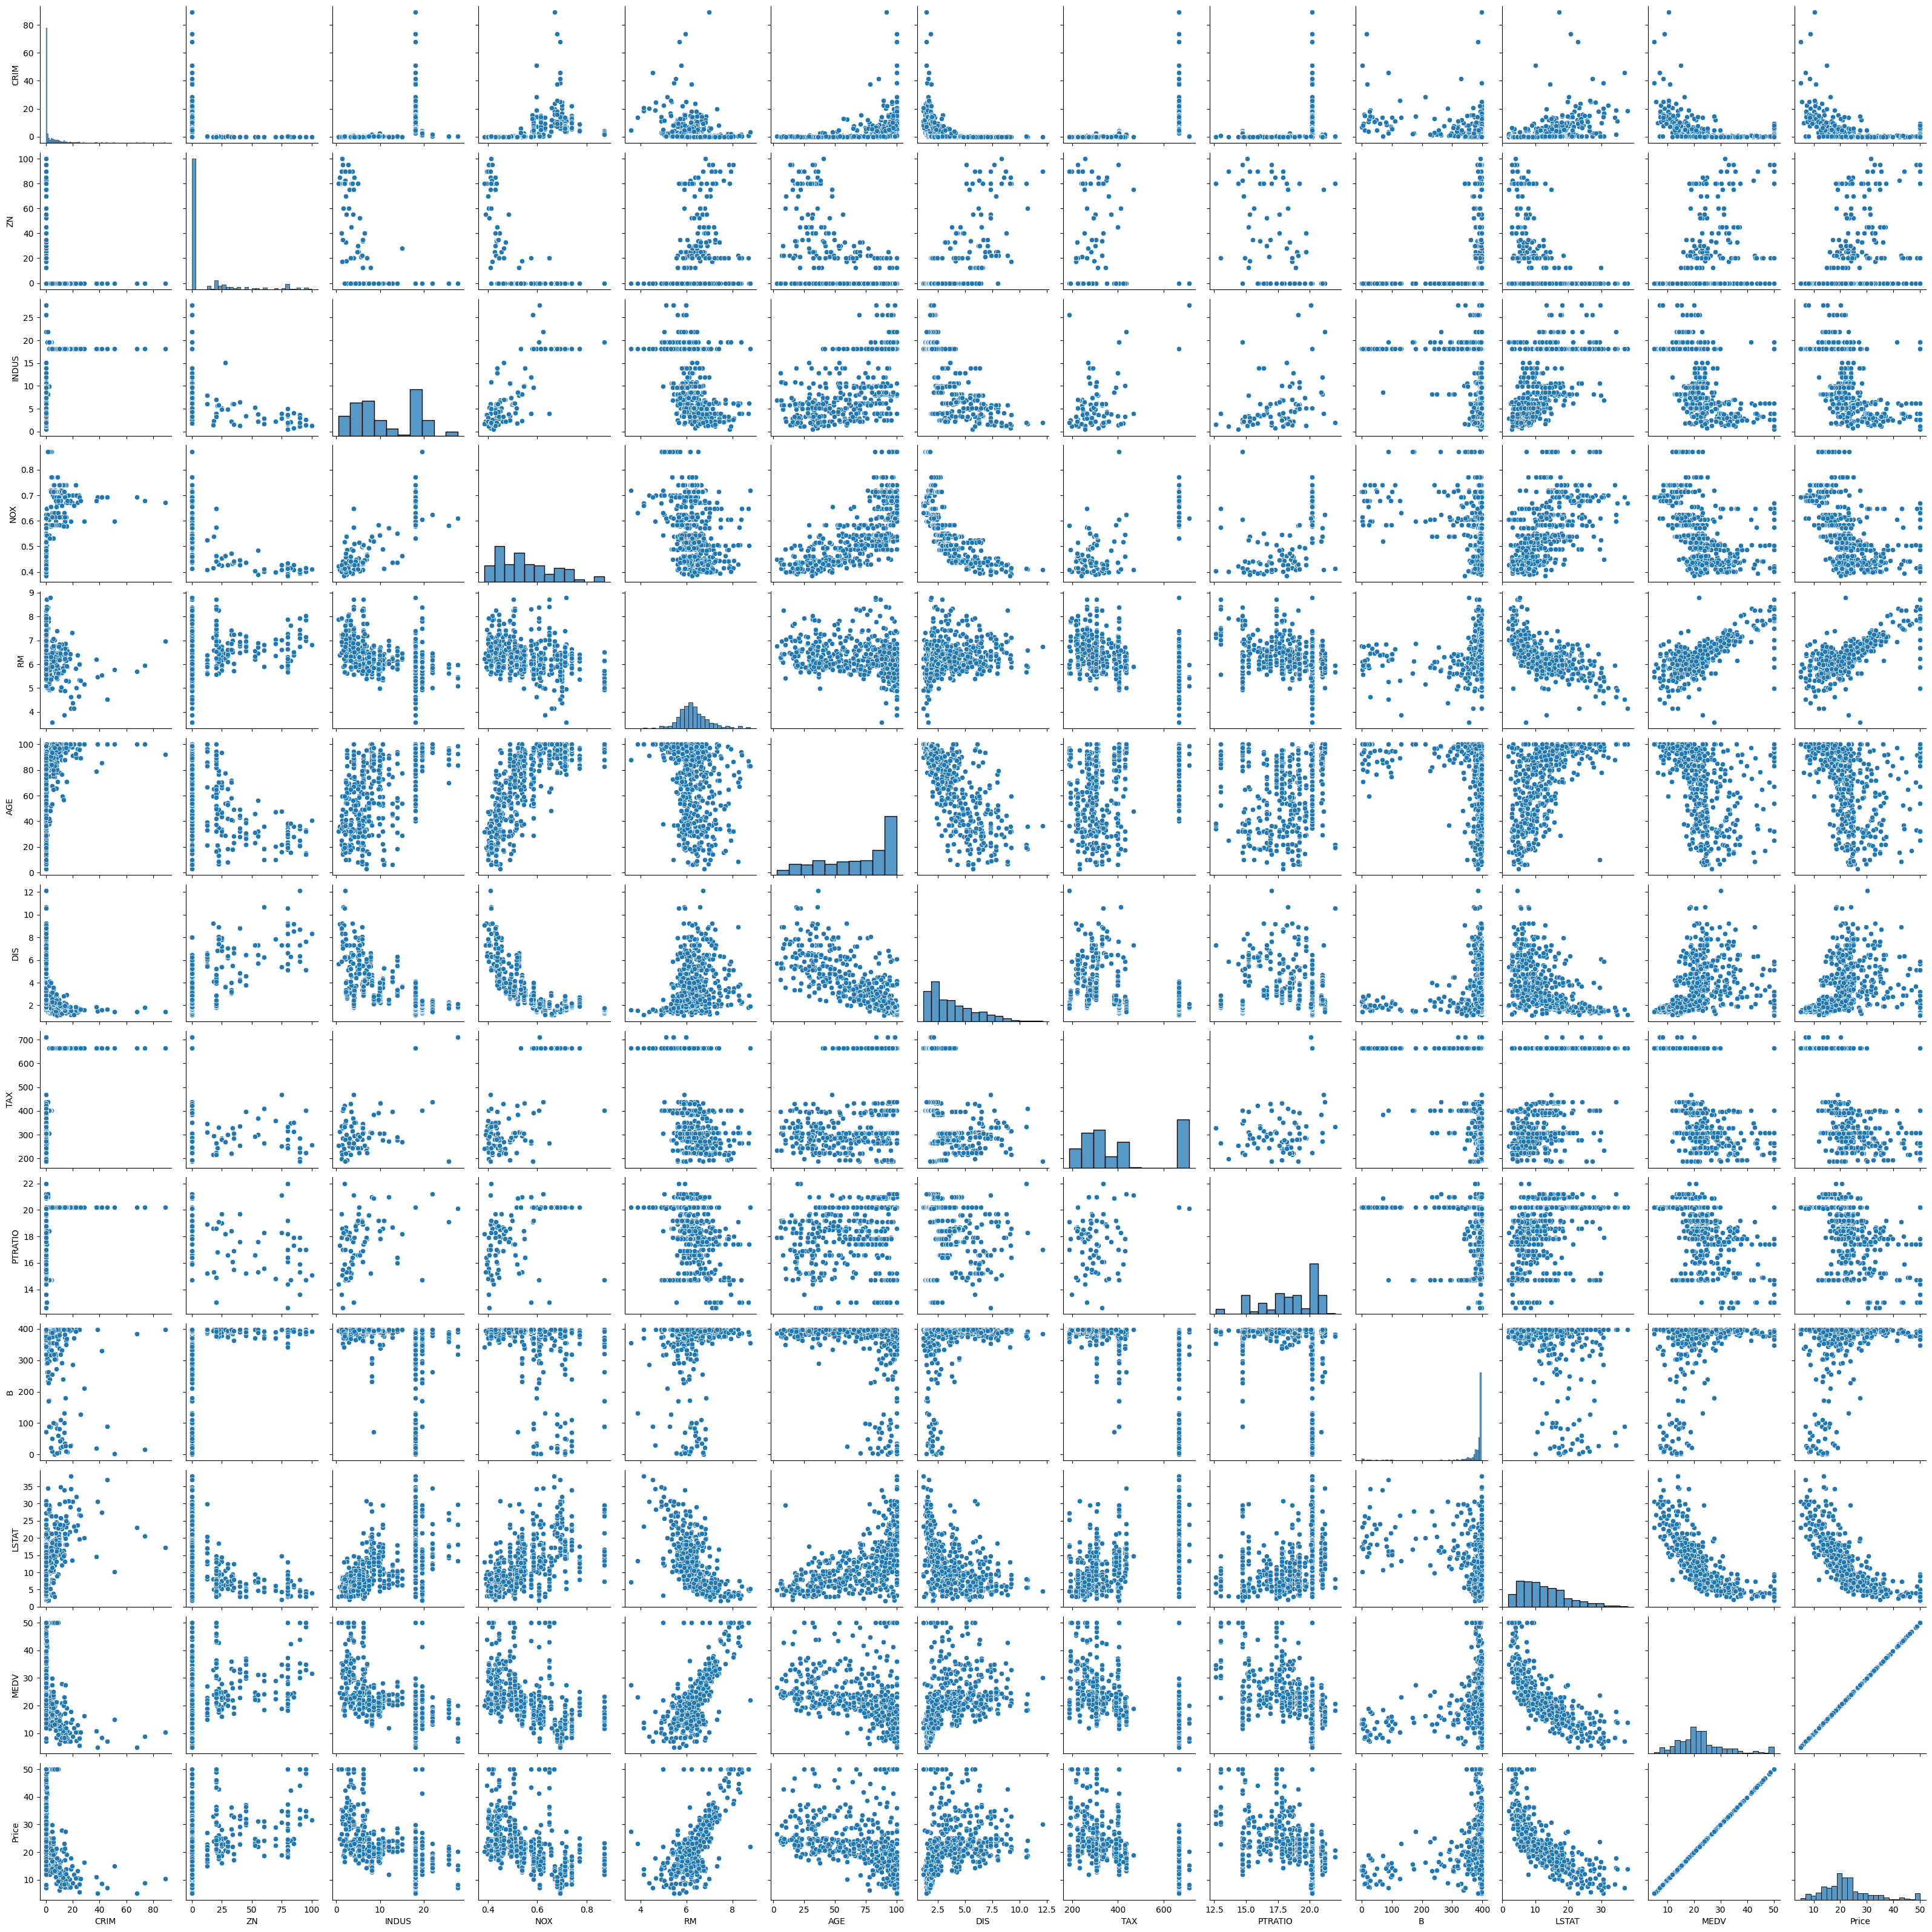

In [12]:
import seaborn as sns
sns.pairplot(df)

Text(0, 0.5, 'Price')

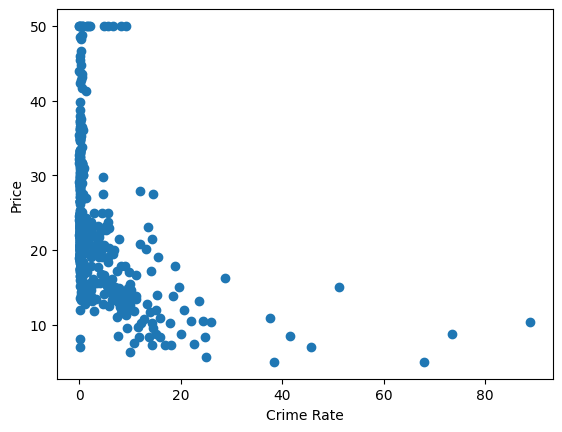

In [13]:
plt.scatter(df['CRIM'], df['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

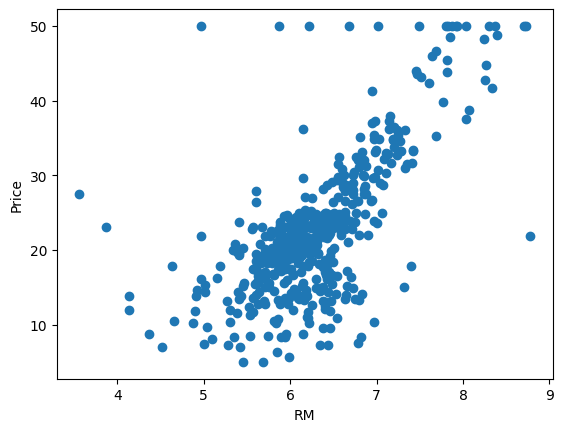

In [14]:
plt.scatter(df['RM'], df['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

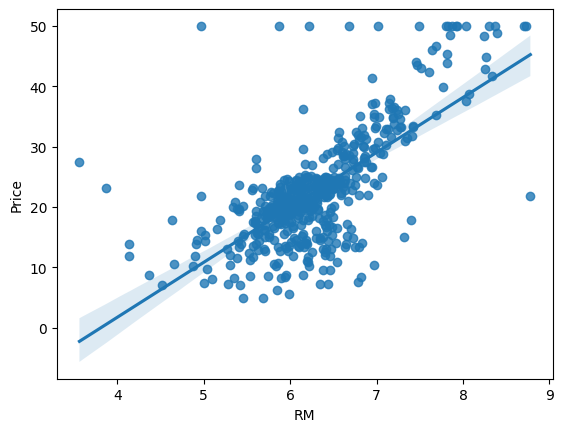

In [15]:
import seaborn as sns
sns.regplot(x="RM", y="Price", data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

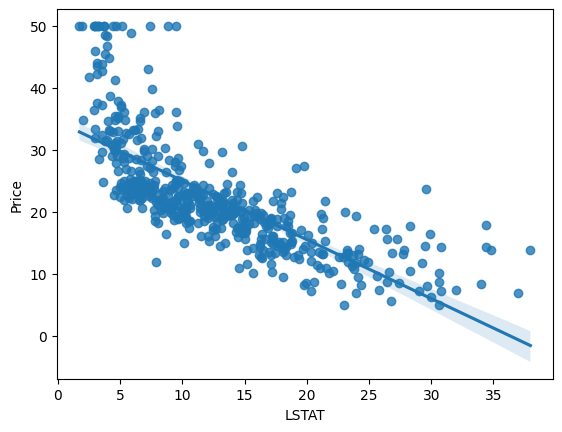

In [16]:
sns.regplot(x="LSTAT", y="Price", data=df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

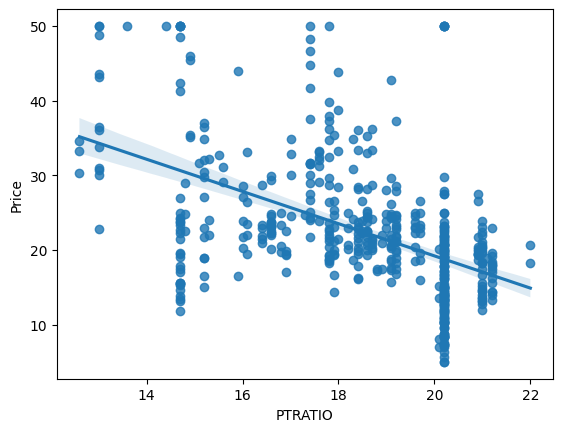

In [17]:
sns.regplot(x="PTRATIO", y="Price", data=df)

In [18]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:, 0:13]
y = df.iloc[:, -1]
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.2 )
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train


array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]], shape=(404, 13))

Model Training

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regression= LinearRegression()

In [22]:
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# print the coefficients and the intercept
print(regression.coef_)

[-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


In [24]:
print(regression.intercept_)

22.796534653465343


In [25]:
# On what parameters, has the model been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [26]:
# Prediction with Test Data
reg_pred = regression.predict(X_test)
reg_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

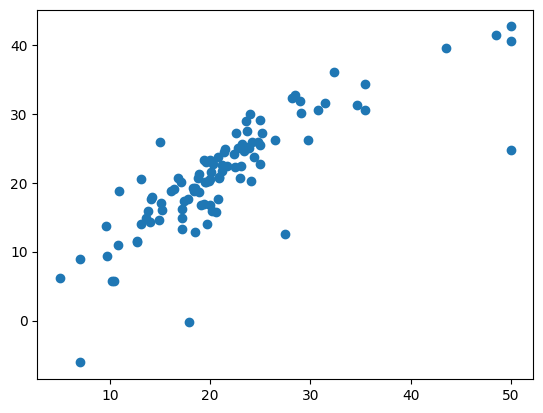

In [27]:
# Visualize with Scatter plot
plt.scatter(y_test, reg_pred)

In [28]:
residuals = y_test-reg_pred
residuals

173    -5.396724
274    -3.625565
491    -1.216944
72     -2.231979
452    -2.669880
         ...    
412    18.064237
436    -4.084867
411     1.016403
86      0.223780
75     -3.079024
Name: Price, Length: 102, dtype: float64

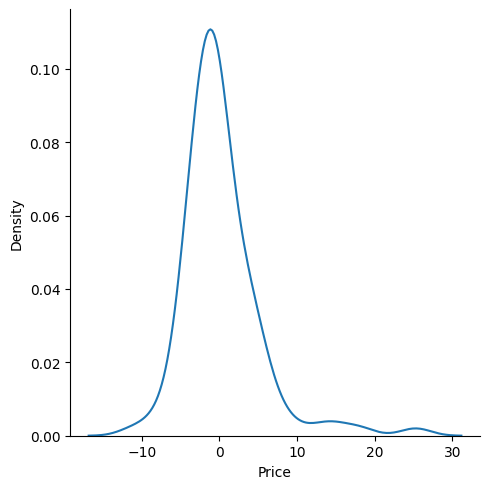

In [29]:
# Plotting the residuals
sns.displot(residuals, kind="kde")

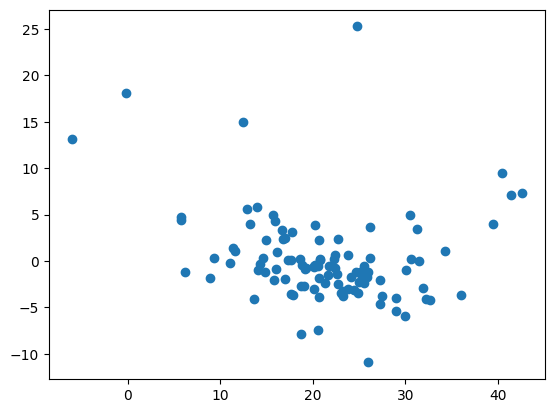

In [30]:
# Scatter Plot with respect to prediction and residuals
plt.scatter(reg_pred, residuals)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.1890919658878483
24.291119474973517
4.928602182665336


R square and adjusted R square

Formula
R^2  = 1-SSR/SST
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
score

0.668759493535632

Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
where:
R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [33]:
# display adjusted R-squared
1-(1-score)* (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6198262368988503

**New data Prediction**

In [34]:
# This is a new data fed to the model
# boston.data[0].shape.reshape(1,-1)

# For the model to predict accurately, we have to standardize out input
# scaler.transform(boston.data[0].shape.reshape(1,-1))

regression.predict(scaler.transform(boston.data.iloc[0].values.reshape(1,-1)))


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])

Pickling The Model file for Deployment

In [39]:
#import pickle

In [40]:
#pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [41]:
#pickled_model = pickle.load(open('regmodel.pkl', 'rb'))

In [42]:
## Prediction
#pickled_model.predict(scaler.transform(boston.data.iloc[0].values.reshape(1,-1)))

In [47]:
# Step 1: Install joblib
!pip install joblib

# Step 2: Save model
import joblib

# Save Linear Regression model
joblib.dump(regression, 'regression.pkl')

# Save the scaler and encoder as well (needed for new data)
joblib.dump(scaler, 'scaler.pkl')
# joblib.dump(encoder, 'encoder.pkl')


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['scaler.pkl']